In [1]:
# Ensure that plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import OpenCV for image processing tasks
import cv2

# Import numpy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import glob to find all file paths matching a specified pattern
from glob import glob

# Import pickle for serializing and deserializing Python object structures
import pickle

# Import TensorFlow for building and training deep learning models
import tensorflow as tf


In [2]:
# Import the drive module from google.colab to mount Google Drive
from google.colab import drive

# Mount Google Drive to access files stored in it
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Define the base path where the dataset is stored in Google Drive
data_path = '/content/drive/MyDrive/Dataset/'

# Define the paths for the training images and their corresponding labels
train_path = "/content/drive/MyDrive/Dataset/train/"
train_label_path = "/content/drive/MyDrive/Dataset/trainannot/"

# Define the paths for the validation images and their corresponding labels
valid_path = "/content/drive/MyDrive/Dataset/val/"
valid_label_path = "/content/drive/MyDrive/Dataset/valannot/"

# Define the paths for the test images and their corresponding labels
test_path = "/content/drive/MyDrive/Dataset/test/"
test_label_path = "/content/drive/MyDrive/Dataset/testannot/"

# Define the file paths to save or load the serialized training, validation, and test datasets
train_file = data_path + "train.p"
valid_file = data_path + "val.p"
test_file = data_path + "test.p"


In [4]:
data_path

'/content/drive/MyDrive/Dataset/'

In [5]:
valid_file

'/content/drive/MyDrive/Dataset/val.p'

In [6]:
# Find and sort all PNG image files in the training images directory
train_list = sorted(glob(train_path + "*.png"))

# Find and sort all PNG image files in the training labels directory
train_label_list = sorted(glob(train_label_path + "*.png"))

# Find and sort all PNG image files in the validation images directory
valid_list = sorted(glob(valid_path + "*.png"))

# Find and sort all PNG image files in the validation labels directory
valid_label_list = sorted(glob(valid_label_path + "*.png"))

# Find and sort all PNG image files in the test images directory
test_list = sorted(glob(test_path + "*.png"))

# Find and sort all PNG image files in the test labels directory
test_label_list = sorted(glob(test_label_path + "*.png"))


In [7]:
valid_path

'/content/drive/MyDrive/Dataset/val/'

In [8]:
# Find all PNG image files in the validation images directory
glob(valid_path + "*.png")


['/content/drive/MyDrive/Dataset/val/0016E5_08119.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08039.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08037.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08053.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08115.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08063.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08107.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_07993.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08009.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08065.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08099.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08113.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_07967.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_07977.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_07971.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_07981.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_08003.png',
 '/content/drive/MyDrive/Dataset/val/0016E5_0802

In [9]:
# Import the cv2_imshow function from google.colab.patches to display images in Colab
from google.colab.patches import cv2_imshow

# Function to convert label images to binary class matrices
def binarylab(labels):
    # Create an empty array with shape (height, width, 12) for storing binary labels
    x = np.zeros([labels.shape[0], labels.shape[1], 12])

    # Iterate over each pixel in the label image
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            # Set the corresponding channel to 1 for the class of the current pixel
            x[i, j, labels[i][j]] = 1

    # Return the binary class matrix
    return x

# Function to create a dataset from lists of image and mask file paths
def make_dataset(image_list, mask_list):
    # Initialize empty lists to store images and masks
    images = []
    masks = []

    # Iterate over pairs of image and mask file paths
    for img, mask in zip(image_list, mask_list):
        # Read and resize the image to 224x224 pixels, then add to the images list
        images.append(cv2.resize(cv2.imread(img), (224, 224)))

        # Read and resize the mask, convert it to a binary class matrix, then add to the masks list
        masks.append(binarylab(cv2.resize(cv2.imread(mask), (224, 224))))

    # Convert lists of images and masks to numpy arrays
    images = np.array(images)
    masks = np.array(masks)

    # Return the images and masks arrays
    return images, masks


In [10]:
# Create the training dataset by calling make_dataset with training image and mask file lists
X_train, y_train = make_dataset(train_list, train_label_list)

# Create the validation dataset by calling make_dataset with validation image and mask file lists
X_val, y_val = make_dataset(valid_list, valid_label_list)

# Create the test dataset by calling make_dataset with test image and mask file lists
X_test, y_test = make_dataset(test_list, test_label_list)


In [11]:
X_val.shape

(101, 224, 224, 3)

In [12]:
# Concatenate the training and validation images to form a combined training set
X_train = np.concatenate([X_train, X_val])

# Concatenate the training and validation masks to form a combined training set
y_train = np.concatenate([y_train, y_val])


(<Axes: >,
 (-0.5, 223.5, 223.5, -0.5))

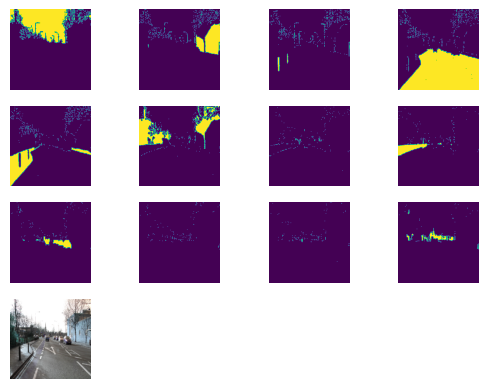

In [13]:
# Import GridSpec from matplotlib.gridspec for creating a grid of subplots
from matplotlib.gridspec import GridSpec

# Import randint and sample from the random module for random number generation
from random import randint, sample

# Generate a random index to select a random training image and its mask
ranidx = randint(0, len(y_train))

# Create a 4x4 grid layout for subplots
gs = GridSpec(4, 4)

# Create a new figure with a specified DPI (dots per inch)
plt.figure(dpi=100)

# Loop to plot the first 12 channels (binary classes) of the randomly selected mask
for i in range(4 * 3):
    # Add a subplot to the grid at the i-th position and plot the i-th channel of the mask
    plt.subplot(gs[i]), plt.imshow(y_train[ranidx][:, :, i]), plt.axis('off')

# Add a subplot to the grid at the 13th position and plot the corresponding training image
plt.subplot(gs[12]), plt.imshow(X_train[ranidx]), plt.axis('off')


In [14]:
# Define the number of classes in the segmentation problem
num_classes = 12

# Define the input shape for the model, which is the shape of a single training image
input_shape = X_train.shape[1:]  # (480, 480, 3)

# Define a smoothing factor to avoid division by zero in some calculations
smooth = 1.

# Define the number of processors to use for parallel processing tasks
nproc = 8


In [15]:
# Import Keras backend as K for using backend-specific functions like TensorFlow operations
from keras import backend as K

# Import the Layer base class from Keras to create custom layers
from keras.layers import Layer

# Define a custom layer for MaxPooling with Argmax
class MaxPoolingWithArgmax2D(Layer):
    def __init__(self, pool_size=(2, 2), strides=(2, 2), padding='same', **kwargs):
        # Initialize the base Layer class with any additional arguments
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)
        # Set the pooling size, stride, and padding for the max pooling operation
        self.padding = padding
        self.pool_size = pool_size
        self.strides = strides

    def call(self, inputs, **kwargs):
        # Print debug message for tracing
        print("max pooling with argmax")
        # Set the local variables for padding, pool size, and strides
        padding = self.padding
        pool_size = self.pool_size
        strides = self.strides
        # Check if the backend is TensorFlow
        if K.backend() == 'tensorflow':
            # Define the kernel size for the pooling operation
            ksize = [1, pool_size[0], pool_size[1], 1]
            # Convert padding to uppercase as required by TensorFlow
            padding = padding.upper()
            # Define the strides for the pooling operation
            strides = [1, strides[0], strides[1], 1]
            # Perform max pooling with argmax using TensorFlow's built-in function
            output, argmax = tf.nn.max_pool_with_argmax(
                inputs,
                ksize=ksize,
                strides=strides,
                padding=padding
            )
        else:
            # Raise an error if the backend is not supported
            errmsg = '{} backend is not supported for layer {}'.format(
                K.backend(), type(self).__name__
            )
            raise NotImplementedError(errmsg)
        # Cast argmax to the same data type as the inputs
        argmax = K.cast(argmax, K.floatx())
        # Return both the pooled output and the argmax indices
        return [output, argmax]

    def compute_output_shape(self, input_shape):
        # Print debug message for tracing
        print("i guess its subsampling")
        # Define the subsampling ratio
        ratio = (1, 2, 2, 1)
        # Calculate the output shape by dividing the input dimensions by the ratio
        output_shape = [
            dim // ratio[idx] if dim is not None else None
            for idx, dim in enumerate(input_shape)
        ]
        # Convert the output shape to a tuple
        output_shape = tuple(output_shape)
        # Return the output shape for both the pooled output and the argmax indices
        return [output_shape, output_shape]

    def compute_mask(self, inputs, mask=None):
        # Print debug message for tracing
        print("no idea what this is: but computing mask")
        # Return None for both outputs, indicating no mask is used
        return 2 * [None]

# Define a custom layer for MaxUnpooling
class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        # Initialize the base Layer class with any additional arguments
        super(MaxUnpooling2D, self).__init__(**kwargs)
        # Set the unpooling size
        self.size = size

    def call(self, inputs, output_shape=None):
        # inputs contains the pooled values and the corresponding max indices
        updates, mask = inputs[0], inputs[1]

        # Create a variable scope for the layer's operations
        with tf.variable_scope(self.name):
            # Cast the mask to integer type
            mask = K.cast(mask, 'int32')
            # Get the dynamic shape of the updates tensor
            input_shape = tf.shape(updates, out_type='int32')

            # Calculate the new shape after unpooling if not provided
            if output_shape is None:
                output_shape = (
                    input_shape[0],
                    input_shape[1] * self.size[0],
                    input_shape[2] * self.size[1],
                    input_shape[3]
                )
            # Store the output shape
            self.output_shape1 = output_shape

            # Calculate indices for batch, height, width, and feature maps
            # Create an array of ones with the same shape as the mask
            one_like_mask = K.ones_like(mask, dtype='int32')
            # Create the shape for the batch dimension
            batch_shape = K.concatenate([[input_shape[0]], [1], [1], [1]], axis=0)
            # Create a range for the batch indices
            batch_range = K.reshape(tf.range(output_shape[0], dtype='int32'), shape=batch_shape)
            # Broadcast the batch range to the shape of the mask
            b = one_like_mask * batch_range

            # Calculate the y indices
            y = mask // (output_shape[2] * output_shape[3])
            # Calculate the x indices
            x = (mask // output_shape[3]) % output_shape[2]
            # Create a range for the feature map indices
            feature_range = tf.range(output_shape[3], dtype='int32')
            # Broadcast the feature range to the shape of the mask
            f = one_like_mask * feature_range

            # Transpose indices and reshape update values to one dimension
            # Get the number of elements in updates
            updates_size = tf.size(updates)
            # Stack and reshape the indices for the scatter operation
            indices = K.transpose(K.reshape(K.stack([b, y, x, f]), [4, updates_size]))
            # Flatten the update values
            values = K.reshape(updates, [updates_size])
            # Scatter the update values to the new shape
            ret = tf.scatter_nd(indices, values, output_shape)
            return ret

    def compute_output_shape(self, input_shape):
        # Get the shape of the mask
        mask_shape = input_shape[1]
        # Calculate and return the new shape after unpooling
        return (
            mask_shape[0],
            mask_shape[1] * self.size[0],
            mask_shape[2] * self.size[1],
            mask_shape[3]
        )


In [16]:
# Import necessary modules from TensorFlow Keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Dense, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K

# Define the SegNet model architecture
def segnet(input_shape, n_labels, kernel=3, pool_size=(2, 2), output_mode="softmax"):
    # Encoder
    inputs = Input(shape=input_shape)  # Define the input layer with the given shape

    # Block 1
    conv_1 = Conv2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block1_conv1")(inputs)  # 1st Conv layer
    conv_1 = BatchNormalization()(conv_1)  # Batch normalization
    conv_1 = Activation("relu")(conv_1)  # ReLU activation
    conv_2 = Conv2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block1_conv2")(conv_1)  # 2nd Conv layer
    conv_2 = BatchNormalization()(conv_2)  # Batch normalization
    conv_2 = Activation("relu")(conv_2)  # ReLU activation
    pool_1 = MaxPooling2D(pool_size, name="block1_pool")(conv_2)  # Max pooling

    # Block 2
    conv_3 = Conv2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block2_conv1")(pool_1)  # 3rd Conv layer
    conv_3 = BatchNormalization()(conv_3)  # Batch normalization
    conv_3 = Activation("relu")(conv_3)  # ReLU activation
    conv_4 = Conv2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block2_conv2")(conv_3)  # 4th Conv layer
    conv_4 = BatchNormalization()(conv_4)  # Batch normalization
    conv_4 = Activation("relu")(conv_4)  # ReLU activation
    pool_2 = MaxPooling2D(pool_size, name="block2_pool")(conv_4)  # Max pooling

    # Block 3
    conv_5 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block3_conv1")(pool_2)  # 5th Conv layer
    conv_5 = BatchNormalization()(conv_5)  # Batch normalization
    conv_5 = Activation("relu")(conv_5)  # ReLU activation
    conv_6 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block3_conv2")(conv_5)  # 6th Conv layer
    conv_6 = BatchNormalization()(conv_6)  # Batch normalization
    conv_6 = Activation("relu")(conv_6)  # ReLU activation
    conv_7 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block3_conv3")(conv_6)  # 7th Conv layer
    conv_7 = BatchNormalization()(conv_7)  # Batch normalization
    conv_7 = Activation("relu")(conv_7)  # ReLU activation
    pool_3 = MaxPooling2D(pool_size, name="block3_pool")(conv_7)  # Max pooling

    # Block 4
    conv_8 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block4_conv1")(pool_3)  # 8th Conv layer
    conv_8 = BatchNormalization()(conv_8)  # Batch normalization
    conv_8 = Activation("relu")(conv_8)  # ReLU activation
    conv_9 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block4_conv2")(conv_8)  # 9th Conv layer
    conv_9 = BatchNormalization()(conv_9)  # Batch normalization
    conv_9 = Activation("relu")(conv_9)  # ReLU activation
    conv_10 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block4_conv3")(conv_9)  # 10th Conv layer
    conv_10 = BatchNormalization()(conv_10)  # Batch normalization
    conv_10 = Activation("relu")(conv_10)  # ReLU activation
    pool_4 = MaxPooling2D(pool_size, name="block4_pool")(conv_10)  # Max pooling

    # Block 5
    conv_11 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block5_conv1")(pool_4)  # 11th Conv layer
    conv_11 = BatchNormalization()(conv_11)  # Batch normalization
    conv_11 = Activation("relu")(conv_11)  # ReLU activation
    conv_12 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block5_conv2")(conv_11)  # 12th Conv layer
    conv_12 = BatchNormalization()(conv_12)  # Batch normalization
    conv_12 = Activation("relu")(conv_12)  # ReLU activation
    conv_13 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block5_conv3")(conv_12)  # 13th Conv layer
    conv_13 = BatchNormalization()(conv_13)  # Batch normalization
    conv_13 = Activation("relu")(conv_13)  # ReLU activation
    pool_5 = MaxPooling2D(pool_size, name="block5_pool")(conv_13)  # Max pooling

    # Decoder
    # Upsampling block 1
    unpool_1 = UpSampling2D(size=pool_size)(pool_5)  # Upsampling the output of block 5

    conv_14 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_1)  # 14th Conv layer
    conv_14 = BatchNormalization()(conv_14)  # Batch normalization
    conv_14 = Activation("relu")(conv_14)  # ReLU activation
    conv_15 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_14)  # 15th Conv layer
    conv_15 = BatchNormalization()(conv_15)  # Batch normalization
    conv_15 = Activation("relu")(conv_15)  # ReLU activation
    conv_16 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_15)  # 16th Conv layer
    conv_16 = BatchNormalization()(conv_16)  # Batch normalization
    conv_16 = Activation("relu")(conv_16)  # ReLU activation

    # Upsampling block 2
    unpool_2 = UpSampling2D(size=pool_size)(conv_16)  # Upsampling the output of previous block

    conv_17 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_2)  # 17th Conv layer
    conv_17 = BatchNormalization()(conv_17)  # Batch normalization
    conv_17 = Activation("relu")(conv_17)  # ReLU activation
    conv_18 = Conv2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_17)  # 18th Conv layer
    conv_18 = BatchNormalization()(conv_18)  # Batch normalization
    conv_18 = Activation("relu")(conv_18)  # ReLU activation
    conv_19 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_18)  # 19th Conv layer
    conv_19 = BatchNormalization()(conv_19)  # Batch normalization
    conv_19 = Activation("relu")(conv_19)  # ReLU activation

    # Upsampling block 3
    unpool_3 = UpSampling2D(size=pool_size)(conv_19)  # Upsampling the output of previous block

    conv_20 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_3)  # 20th Conv layer
    conv_20 = BatchNormalization()(conv_20)  # Batch normalization
    conv_20 = Activation("relu")(conv_20)  # ReLU activation
    conv_21 = Conv2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_20)  # 21st Conv layer
    conv_21 = BatchNormalization()(conv_21)  # Batch normalization
    conv_21 = Activation("relu")(conv_21)  # ReLU activation
    conv_22 = Conv2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_21)  # 22nd Conv layer
    conv_22 = BatchNormalization()(conv_22)  # Batch normalization
    conv_22 = Activation("relu")(conv_22)  # ReLU activation

    # Upsampling block 4
    unpool_4 = UpSampling2D(size=pool_size)(conv_22)  # Upsampling the output of previous block

    conv_23 = Conv2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_4)  # 23rd Conv layer
    conv_23 = BatchNormalization()(conv_23)  # Batch normalization
    conv_23 = Activation("relu")(conv_23)  # ReLU activation
    conv_24 = Conv2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_23)  # 24th Conv layer
    conv_24 = BatchNormalization()(conv_24)  # Batch normalization
    conv_24 = Activation("relu")(conv_24)  # ReLU activation

    # Upsampling block 5
    unpool_5 = UpSampling2D(size=pool_size)(conv_24)  # Upsampling the output of previous block

    conv_25 = Conv2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_5)  # 25th Conv layer
    conv_25 = BatchNormalization()(conv_25)  # Batch normalization
    conv_25 = Activation("relu")(conv_25)  # ReLU activation

    # Final convolution to match the number of output labels
    conv_26 = Conv2D(n_labels, (1, 1), padding="same", kernel_initializer='he_normal')(conv_25)  # 26th Conv layer
    conv_26 = BatchNormalization()(conv_26)  # Batch normalization

    # Dense layer to produce the final output
    conv_26 = Dense(12)(conv_26)  # Dense layer
    outputs = Activation(output_mode)(conv_26)  # Final activation based on the output mode

    print("Build decoder done..")  # Debug message indicating completion of the decoder

    # Create the Keras model
    model = Model(inputs=inputs, outputs=outputs, name="SegNet")  # Define the model

    return model  # Return the model


In [17]:
model= segnet(input_shape=input_shape, n_labels=12)  # Create a SegNet model instance with specified input shape and number of output labels


Build decoder done..


In [18]:
model.summary()  # Print a summary of the model architecture, including the layers, output shapes, and number of parameters


Model: "SegNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                           

In [19]:
VGG16_MODEL = tf.keras.applications.VGG16(include_top=False, weights='imagenet')  # Load the VGG16 model without the top (fully connected) layers, with pretrained weights from ImageNet


58889256/58889256 [==============================] - 0s 0us/step


In [20]:
VGG16_MODEL.summary()  # Print a summary of the VGG16 model architecture, including the layers, output shapes, and number of parameters


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [21]:
from tensorflow.keras.layers import Conv2D  # Import the Conv2D layer from Keras

layers = model.layers  # Get the layers of the SegNet model
merged_layers = []  # Initialize a list to store the Conv2D layers from the SegNet model
count = 1  # Initialize a counter

for _layer in layers:  # Iterate through each layer in the SegNet model
  if isinstance(_layer, Conv2D):  # Check if the layer is a Conv2D layer
    merged_layers.append(_layer)  # Append the Conv2D layer to the merged_layers list
  if _layer.name == "block5_pool":  # Check if the layer's name is "block5_pool"
    break  # Break the loop when "block5_pool" is reached

vgg_layer = []  # Initialize a list to store the Conv2D layers from the VGG16 model
vgg_layers = VGG16_MODEL.layers  # Get the layers of the VGG16 model

for _layer in vgg_layers:  # Iterate through each layer in the VGG16 model
  if isinstance(_layer, Conv2D):  # Check if the layer is a Conv2D layer
    vgg_layer.append(_layer)  # Append the Conv2D layer to the vgg_layer list

for seg_model, vgg_model in zip(merged_layers, vgg_layer):  # Iterate through the Conv2D layers of both models
  wk0 = vgg_model.get_weights()  # Get the weights of the VGG16 Conv2D layer
  seg_model.set_weights(wk0)  # Set the weights of the SegNet Conv2D layer to the VGG16 weights


In [22]:
sgd = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)  # Create an SGD optimizer with a learning rate of 0.1 and momentum of 0.9
model.compile(
    loss="categorical_crossentropy",  # Specify the loss function as categorical cross-entropy
    optimizer='sgd',  # Use the SGD optimizer defined above
    metrics=['acc']  # Use accuracy as a metric to evaluate the model's performance
)


In [23]:
history = model.fit(
    X_train, y_train,  # Train the model on the training data (X_train, y_train)
    batch_size=12,  # Set the batch size to 12
    epochs=10,  # Train the model for 10 epochs
    shuffle=True,  # Shuffle the training data before each epoch
    validation_split=0.1  # Use 10% of the training data as validation data
)


Epoch 1/10
36/36 [==============================] - 47s 673ms/step - loss: 1.7519 - acc: 0.4941 - val_loss: 2.3278 - val_acc: 0.2963
Epoch 2/10
36/36 [==============================] - 15s 418ms/step - loss: 1.1114 - acc: 0.7354 - val_loss: 1.9687 - val_acc: 0.5194
Epoch 3/10
36/36 [==============================] - 15s 423ms/step - loss: 0.9273 - acc: 0.7814 - val_loss: 1.4052 - val_acc: 0.7227
Epoch 4/10
36/36 [==============================] - 15s 426ms/step - loss: 0.8331 - acc: 0.7996 - val_loss: 1.0273 - val_acc: 0.7748
Epoch 5/10
36/36 [==============================] - 15s 430ms/step - loss: 0.7682 - acc: 0.8118 - val_loss: 0.8929 - val_acc: 0.7822
Epoch 6/10
36/36 [==============================] - 16s 433ms/step - loss: 0.7278 - acc: 0.8182 - val_loss: 0.8506 - val_acc: 0.7803
Epoch 7/10
36/36 [==============================] - 16s 436ms/step - loss: 0.6917 - acc: 0.8251 - val_loss: 0.7615 - val_acc: 0.7939
Epoch 8/10
36/36 [==============================] - 16s 439ms/step - 

In [24]:
history.history.keys()  # Retrieve the keys from the training history dictionary


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [25]:
model.evaluate(X_test, y_test)  # Evaluate the model on the test data (X_test, y_test)


8/8 [==============================] - 16s 835ms/step - loss: 0.8934 - acc: 0.7626


[0.8933729529380798, 0.762596607208252]

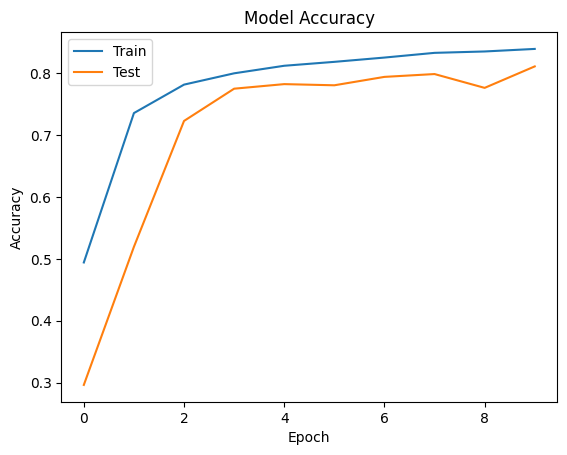

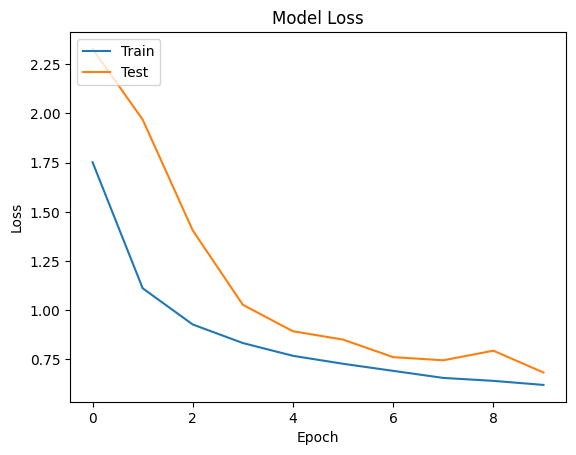

In [26]:
# Plot training and validation accuracy values
plt.plot(history.history['acc'])  # Plot the training accuracy
plt.plot(history.history['val_acc'])  # Plot the validation accuracy
plt.title('Model Accuracy')  # Set the title of the plot
plt.ylabel('Accuracy')  # Set the y-axis label
plt.xlabel('Epoch')  # Set the x-axis label
plt.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot
plt.show()  # Display the plot

# Plot training and validation loss values
plt.plot(history.history['loss'])  # Plot the training loss
plt.plot(history.history['val_loss'])  # Plot the validation loss
plt.title('Model Loss')  # Set the title of the plot
plt.ylabel('Loss')  # Set the y-axis label
plt.xlabel('Epoch')  # Set the x-axis label
plt.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot
plt.show()  # Display the plot


8/8 [==============================] - 2s 282ms/step


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 223.5, 223.5, -0.5))

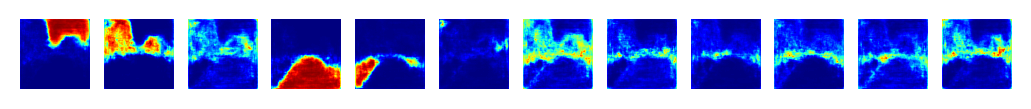

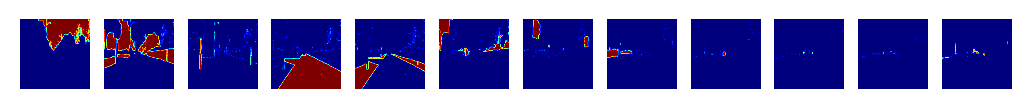

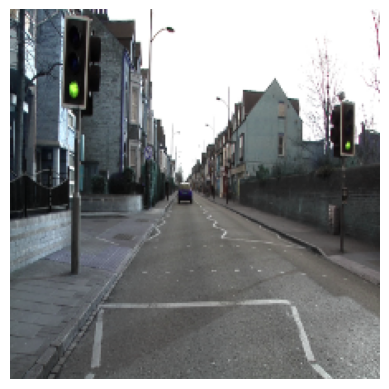

In [29]:
# Predict the segmentation on the test set
pred = model.predict(X_test, verbose=1)

# Select a random index from the test set
ranidx = randint(0, len(y_test))

# Create a grid for plotting the predicted masks
gs = GridSpec(1, 12)
plt.figure(dpi=200)
for i in range(12):
    plt.subplot(gs[i]), plt.imshow(pred[ranidx][:,:,i], cmap='jet'), plt.axis('off')  # Plot each predicted mask

# Create a grid for plotting the ground truth masks
plt.figure(dpi=200)
for i in range(12):
    plt.subplot(gs[i]), plt.imshow(y_test[ranidx][:,:,i], cmap='jet'), plt.axis('off')  # Plot each ground truth mask

# Plot the original test image
plt.figure(), plt.imshow(X_test[ranidx]), plt.axis('off')


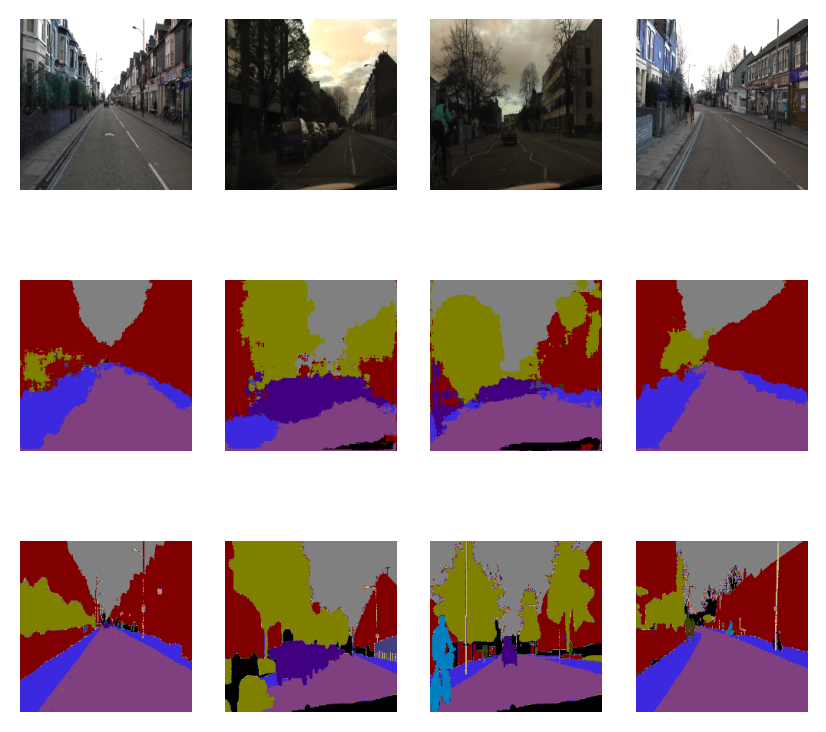

In [35]:
# Define RGB color codes for each class label
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

# Create a label color mapping array
label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

def visualize(temp, plot=True):
    """
    This function converts a 2D array of class predictions into an RGB image using the label color map.
    Arguments:
    temp -- a 2D array of predicted class labels.
    plot -- if True, the function will plot the image. If False, it returns the RGB image.
    """
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()

    # Assign the corresponding RGB color to each class label in the image
    for l in range(len(label_colours)):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    # Create an RGB image
    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r / 255.0)
    rgb[:,:,1] = (g / 255.0)
    rgb[:,:,2] = (b / 255.0)

    if plot:
        plt.imshow(rgb)
    else:
        return rgb

# Randomly select 4 samples from the predictions
randsample = sample(range(0, len(pred)), 4)

# Create a grid layout for plotting
gs = GridSpec(3, 5)
plt.figure(dpi=200)

# Plot the original image, model prediction, and ground truth for each selected sample
for i in range(4):
    # Visualize the model's prediction
    output = visualize(np.argmax(pred[randsample[i]], axis=2).reshape((224, 224)), plot=False)
    # Visualize the ground truth mask
    out_test = visualize(np.argmax(y_test[randsample[i]], axis=2).reshape((224, 224)), plot=False)

    # Plot the original image
    plt.subplot(gs[i]), plt.imshow(X_test[randsample[i]]), plt.axis('off')
    # Plot the model's prediction
    plt.subplot(gs[5+i]), plt.imshow(output), plt.axis('off')
    # Plot the ground truth mask
    plt.subplot(gs[10+i]), plt.imshow(out_test), plt.axis('off')
